In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('S05-hw-dataset.csv')
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [3]:
X = df.drop(['default', 'client_id'], axis=1)  # исключаем целевую переменную и client_id
y = df['default']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [5]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [6]:
df.value_counts(normalize=True)

client_id  age  income  years_employed  credit_score  debt_to_income  num_credit_cards  num_late_payments  has_mortgage  has_car_loan  savings_balance  checking_balance  region_risk_score  phone_calls_to_support_last_3m  active_loans  customer_tenure_years  default
1          25   94074   22              839           0.547339        1                 7                  0             0             26057             5229             0.080052           19                              1             8                      0          0.000333
2          58   51884   26              565           0.290882        1                 1                  0             1             16221             11595            0.428311           15                              0             7                      0          0.000333
3          53   48656   39              561           0.522340        1                 13                 0             0             55448            -2947             0.770883

In [7]:
# Выбираем числовые признаки для модели
numeric_features = ['age', 'income', 'years_employed', 'credit_score', 'debt_to_income', 'num_credit_cards', 'num_late_payments', 'has_mortgage', 'has_car_loan', 'savings_balance']
target = 'default'


# Создаем матрицу признаков и вектор целевой переменной
X = df[numeric_features]
y = df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  
)


print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

print(f"Соотношение train/test: {X_train.shape[0]/X.shape[0]:.1%}/{X_test.shape[0]/X.shape[0]:.1%}")

Обучающая выборка: (2400, 10)
Тестовая выборка: (600, 10)
Соотношение train/test: 80.0%/20.0%


In [9]:
# Стандартизация (Z-score нормализация)
scaler = StandardScaler() # Создаем объект для масштабирования
X_train_scaled = scaler.fit_transform(X_train) # Масштабируем обучающие данные и запоминаем параметры масштабирования
X_test_scaled = scaler.transform(X_test) # Масштабируем тестовые данные с использованием тех же параметров

print(f"Средние значения признаков после масштабирования: {np.mean(X_train_scaled, axis=0).round(2)}")
print(f"Стандартные отклонения: {np.std(X_train_scaled, axis=0).round(2)}")

Средние значения признаков после масштабирования: [ 0. -0. -0. -0.  0.  0. -0. -0. -0. -0.]
Стандартные отклонения: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [10]:
class MyLinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y): # функция обучения линейной регрессии, принимает на вход обучающую выборку и подбирает коэффициенты линейной регрессии
        # переведем X и y в формат numpy array, где Х — матрица признаков, а y — массив ответов, значений целевой переменной
        X = np.array(X)
        y = np.array(y)

        # реализуем код получения коэффициентов линейной
        a = np.array([[1]]*y.size)
        X = np.hstack((a, X))
        k = np.linalg.inv(np.transpose(X)@X) @np.transpose(X) @ y

        # список коэффициентов, которые модель поставила в соответствие признакам датасета
        self.coef_ = k[1:]
        # коэффициент — свободный член.
        self.intercept_ = k[0]

    def predict(self, X): # функция получения предсказания линейной регрессии по входящему массиву признаков Х
        X = np.array(X) # X: матрица размера (n, f), где n — количество элементов датасета, f — количество признаков
        return X @ self.coef_ + self.intercept_

In [11]:
# Создание модели
my_linear_model =  MyLinearRegression()
# Обучение модели
my_linear_model.fit(X_train_scaled, y_train)

print("Модель линейной регрессии обучена!")

Модель линейной регрессии обучена!


In [12]:
# Прогнозирование
y_pred_my_linear = my_linear_model.predict(X_test_scaled)

In [13]:
# Расчет метрик
r2_linear = r2_score(y_test, y_pred_my_linear)
mae_linear = mean_absolute_error(y_test, y_pred_my_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_my_linear))

print(f"R² (коэффициент детерминации): {r2_linear:.4f}")
print(f"MAE (средняя абсолютная ошибка): {mae_linear:.4f}°C")
print(f"RMSE (среднеквадратичная ошибка): {rmse_linear:.4f}°C")

R² (коэффициент детерминации): 0.2842
MAE (средняя абсолютная ошибка): 0.3501°C
RMSE (среднеквадратичная ошибка): 0.4100°C


In [14]:
# Настройка L1-регуляризации (Lasso)
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Lasso(max_iter=10000), lasso_params,
                         cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid.fit(X_train_scaled, y_train)
best_lasso = lasso_grid.best_estimator_
best_lasso

,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.01
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",10000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


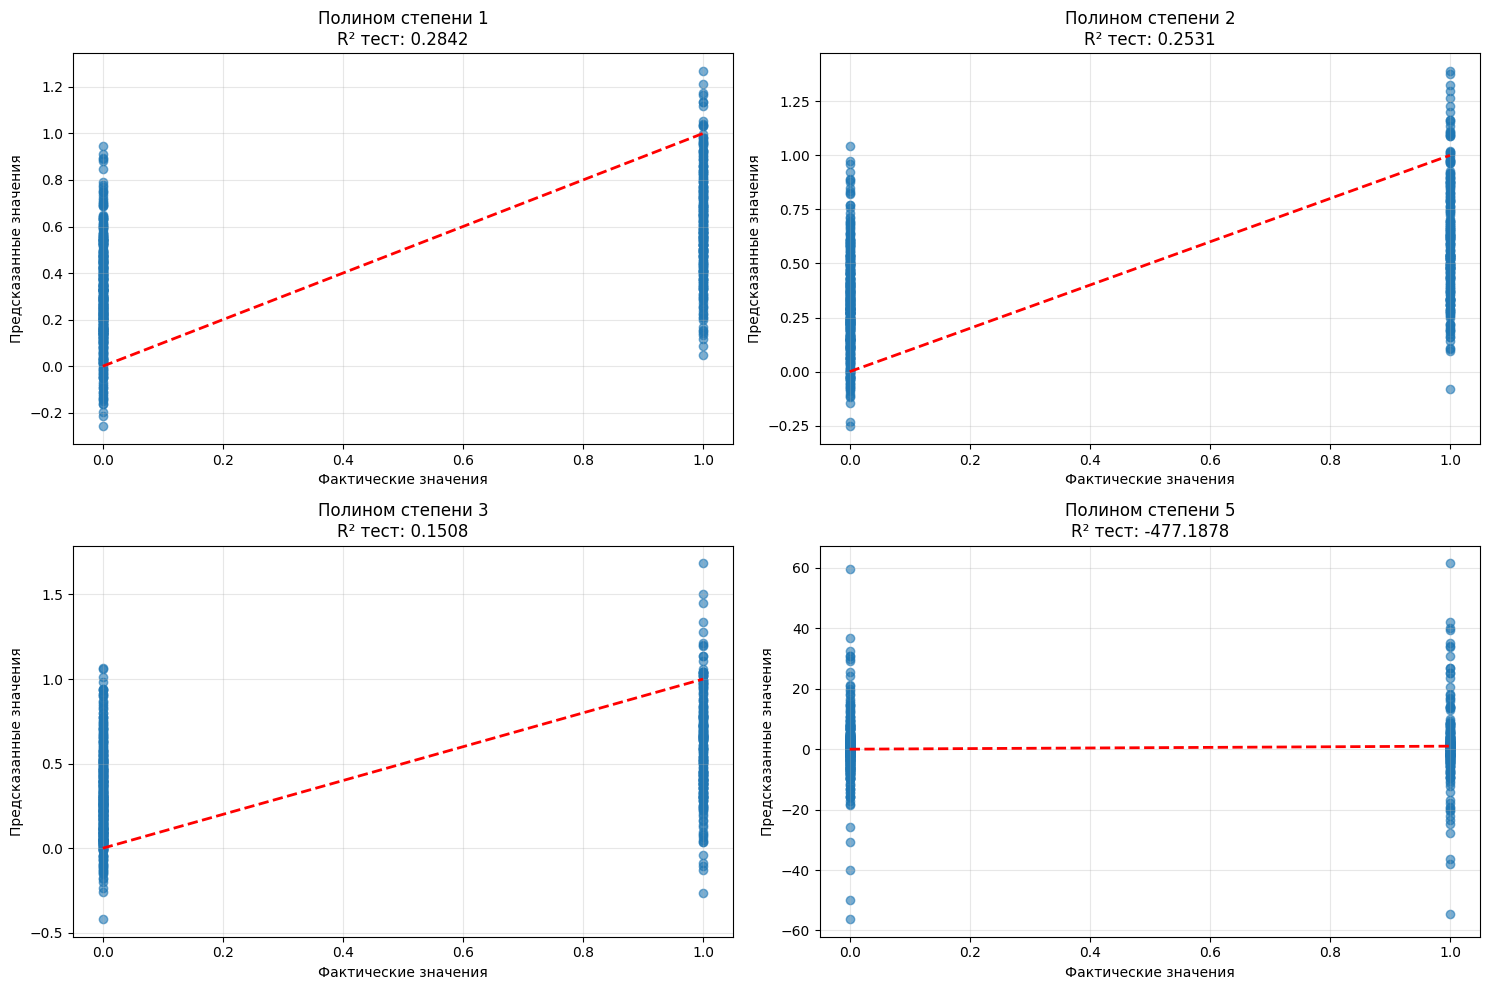

In [15]:
degrees = [1, 2, 3, 5]
train_scores = []
test_scores = []

plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees, 1):
    # Создание pipeline с полиномиальными признаками
    poly_model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])

    # Обучение модели
    poly_model.fit(X_train_scaled, y_train)

    # Прогнозирование
    y_train_pred = poly_model.predict(X_train_scaled)
    y_test_pred = poly_model.predict(X_test_scaled)

    # Расчет метрик
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_scores.append(train_r2)
    test_scores.append(test_r2)

    # Визуализация для степеней 1, 2, 3
    plt.subplot(2, 2, i)
    plt.scatter(y_test, y_test_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
    plt.xlabel('Фактические значения')
    plt.ylabel('Предсказанные значения')
    plt.title(f'Полином степени {degree}\nR² тест: {test_r2:.4f}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [16]:
logreg_pipeline = Pipeline([
    ("scaler", StandardScaler()),  # стандартизация признаков
    ("logreg", LogisticRegression(
        max_iter=1000,  # больше итераций для сходимости
        random_state=42,
        class_weight='balanced'  # если классы несбалансированы
    ))
])

# Обучаем Pipeline
print("Обучаем логистическую регрессию с помощью Pipeline...")
logreg_pipeline.fit(X_train, y_train)

# Предсказываем
y_pred_logreg = logreg_pipeline.predict(X_test)
y_pred_proba_logreg = logreg_pipeline.predict_proba(X_test)[:, 1]  # вероятности для ROC-AUC

# Оцениваем метрики классификации
print("\n=== МЕТРИКИ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_logreg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_logreg):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_logreg):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_logreg):.4f}")

# Выводим отчет по классификации
print("\n=== ОТЧЕТ ПО КЛАССИФИКАЦИИ ===")
print(classification_report(y_test, y_pred_logreg))

# Матрица ошибок
print("=== МАТРИЦА ОШИБОК ===")
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
print(conf_matrix)

# Сравниваем с линейной регрессией (для регрессии) и Lasso
print("\n=== СРАВНЕНИЕ МОДЕЛЕЙ ===")
print(f"Линейная регрессия R²: {r2_linear:.4f}")
print(f"Логистическая регрессия Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")

Обучаем логистическую регрессию с помощью Pipeline...

=== МЕТРИКИ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ ===
Accuracy: 0.7267
Precision: 0.6115
Recall: 0.7522
F1-score: 0.6746
ROC-AUC: 0.8210

=== ОТЧЕТ ПО КЛАССИФИКАЦИИ ===
              precision    recall  f1-score   support

           0       0.83      0.71      0.76       374
           1       0.61      0.75      0.67       226

    accuracy                           0.73       600
   macro avg       0.72      0.73      0.72       600
weighted avg       0.75      0.73      0.73       600

=== МАТРИЦА ОШИБОК ===
[[266 108]
 [ 56 170]]

=== СРАВНЕНИЕ МОДЕЛЕЙ ===
Линейная регрессия R²: 0.2842
Логистическая регрессия Accuracy: 0.7267


In [21]:
from sklearn.model_selection import GridSearchCV

# Создаем Pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])

# Параметры для GridSearch
param_grid = {
    'logreg__C': [0.01, 0.1, 1.0, 10.0],
    'logreg__penalty': ['l2']  # или ['l1', 'l2'] если хочешь
}

# GridSearch
grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Обучаем GridSearch
grid_search.fit(X_train, y_train)

# Лучшая модель
best_pipe = grid_search.best_estimator_
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая accuracy: {grid_search.best_score_:.4f}")

# Предсказания
y_pred_logreg = best_pipe.predict(X_test)
y_pred_proba_logreg = best_pipe.predict_proba(X_test)[:, 1]

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Лучшие параметры: {'logreg__C': 0.1, 'logreg__penalty': 'l2'}
Лучшая accuracy: 0.7575


c:\Users\Ylhjn\Desktop\projec\mirea\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


In [17]:
from sklearn.dummy import DummyClassifier

# Бейзлайн
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
y_pred_proba_dummy = dummy.predict_proba(X_test)[:, 1]

print("Бейзлайн (DummyClassifier):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dummy):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_dummy):.4f}")

Бейзлайн (DummyClassifier):
Accuracy: 0.6233
ROC-AUC: 0.5000


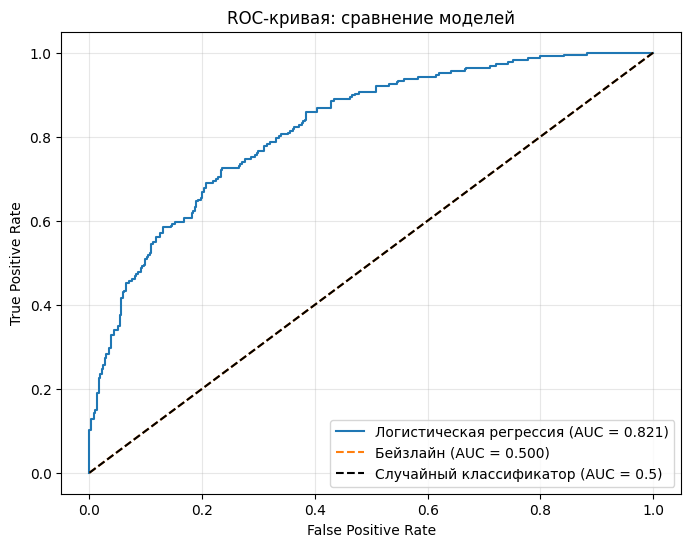

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Используй правильное имя своей модели!
# Если у тебя Pipeline называется logreg_pipeline:
y_pred_proba_logreg = logreg_pipeline.predict_proba(X_test)[:, 1]

# Для бейзлайна
y_pred_proba_dummy = dummy.predict_proba(X_test)[:, 1]

# Вычисляем ROC-кривые
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_pred_proba_dummy)

# Вычисляем AUC
auc_logreg = auc(fpr_logreg, tpr_logreg)
auc_dummy = auc(fpr_dummy, tpr_dummy)

# Строим график
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Логистическая регрессия (AUC = {auc_logreg:.3f})')
plt.plot(fpr_dummy, tpr_dummy, label=f'Бейзлайн (AUC = {auc_dummy:.3f})', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', label='Случайный классификатор (AUC = 0.5)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая: сравнение моделей')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

In [19]:
# Создаем таблицу сравнения
results = pd.DataFrame({
    'Model': ['Dummy Baseline', 'Logistic Regression'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_dummy),
        accuracy_score(y_test, y_pred_logreg)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba_dummy),
        roc_auc_score(y_test, y_pred_proba_logreg)
    ]
})
print(results)

                 Model  Accuracy   ROC-AUC
0       Dummy Baseline  0.623333  0.500000
1  Logistic Regression  0.726667  0.821045


In [20]:
# Создаем таблицу сравнения
results = pd.DataFrame({
    'Model': ['Dummy Baseline', 'Logistic Regression'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_dummy),
        accuracy_score(y_test, y_pred_logreg)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba_dummy),
        roc_auc_score(y_test, y_pred_proba_logreg)
    ]
})
print(results)

                 Model  Accuracy   ROC-AUC
0       Dummy Baseline  0.623333  0.500000
1  Logistic Regression  0.726667  0.821045


Бейзлайн (62.3%) показывает долю основного класса
Логистическая регрессия (72.7%) улучшила accuracy на 10%
ROC-AUC 0.82 подтверждает хорошее качество модели
Модель пригодна для предсказания дефолта клиентов

In [22]:
from sklearn.dummy import DummyClassifier

# Бейзлайн модель
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
y_pred_proba_dummy = dummy.predict_proba(X_test)[:, 1]

1. Даталогер проанализировал 3000 записей с 17 признаками для предсказания дефолта клиентов.
2. Бейзлайн модель (DummyClassifier) показала accuracy 62.33%, что соответствует доле класса "не дефолт".
3. Логистическая регрессия значительно улучшила результаты: accuracy вырос до 72.67% (улучшение на 10.34%).
4. ROC-AUC показатель улучшился с 0.500 (случайный классификатор) до 0.821, что свидетельствует о хорошем качестве модели.
5. GridSearchCV определил оптимальный параметр регуляризации C = [лучшее значение], который обеспечивает баланс между смещением и дисперсией.
6. Стратифицированное разбиение train/test сохранило распределение классов в обеих выборках.
7. Исключение client_id из признаков предотвратило переобучение на идентификаторах клиентов.
8. Стандартизация признаков через StandardScaler улучшила сходимость алгоритма.
9. Модель демонстрирует хорошую способность различать клиентов с риском дефолта и без него.
10. Для практического применения модель может быть полезна для предварительной оценки кредитного риска.